# EDA - Prediciendo la diabetes

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Problem statement and data collection

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

- Pregnancies - Número de embarazos del paciente -> n
- Glucose - Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa -> n
- BloodPressure - Presión arterial diastólica (medida en mm Hg) -> n
- SkinThickness - Grosor del pliegue cutáneo del tríceps (medida en mm) -> n
- Insulin - Insulina sérica de 2 horas (medida en mu U/ml) -> n
- BMI - Índice de masa corporal -> n
- DiabetesPedigreeFunction - Función de pedigrí de diabetes -> n
- Age - Edad del paciente -> n
- Outcome. **TARGET** - Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo -> n

* n - numerical

In [4]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 768 rows, indicating the total number of rentals, and has a shape of (768, 9).


In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2.2 Identifying Null Values and data types for each feature

In [6]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [7]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Numerical Variable Analysis

In [8]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

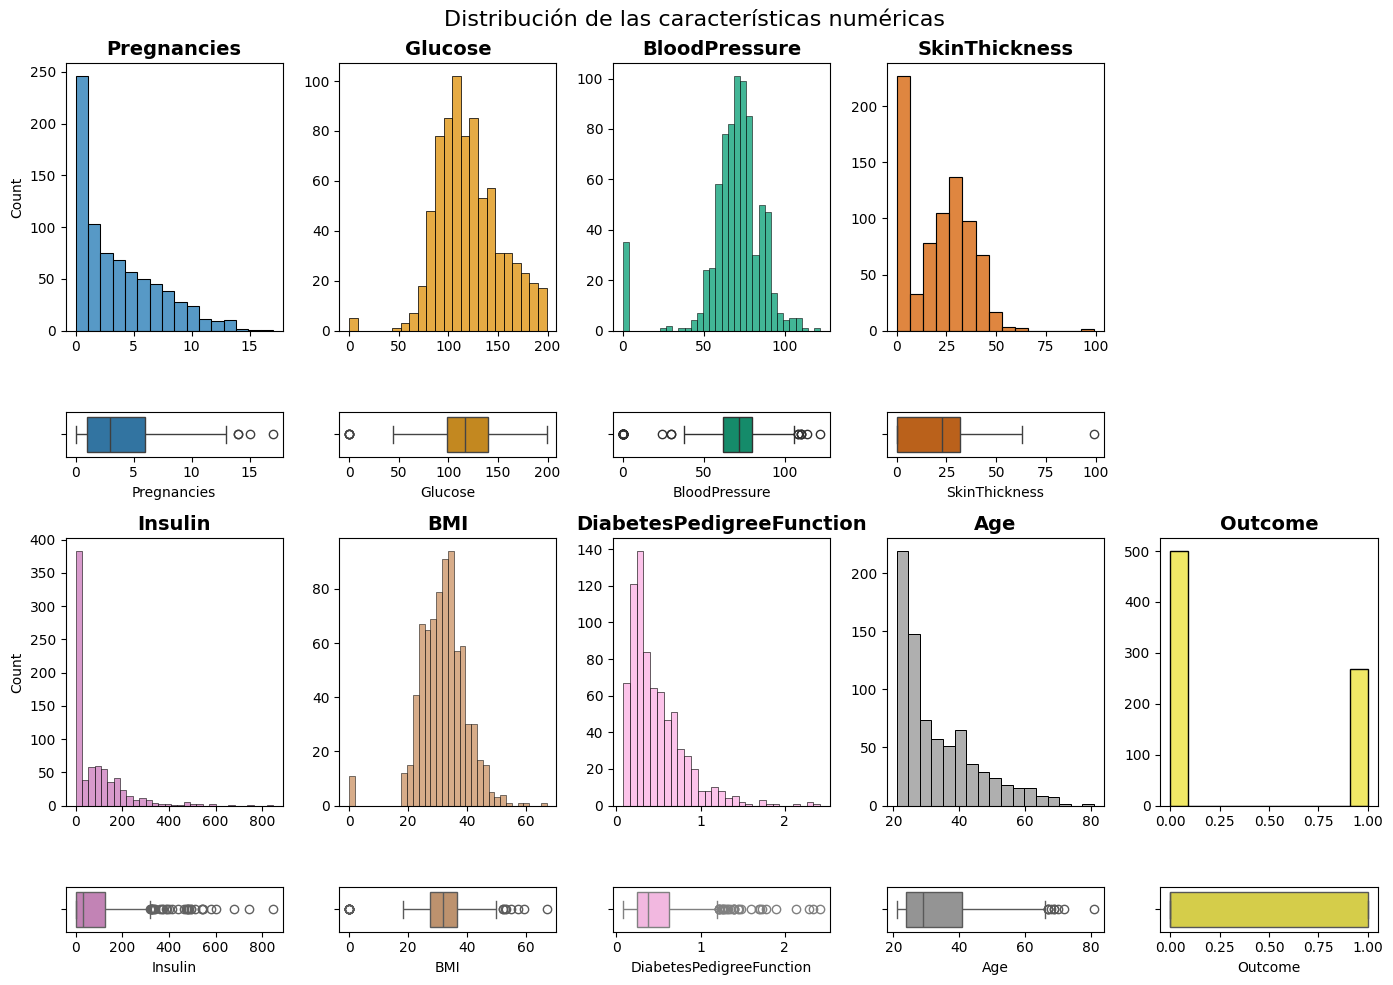

In [9]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 5, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7])

sns.histplot(ax = axis[2, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8])

axis[0, 0].set_title("Pregnancies", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Glucose", fontsize=14, fontweight='bold')
axis[0, 2].set_title("BloodPressure", fontsize=14, fontweight='bold')
axis[0, 3].set_title("SkinThickness", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Insulin", fontsize=14, fontweight='bold')
axis[2, 1].set_title("BMI", fontsize=14, fontweight='bold')
axis[2, 2].set_title("DiabetesPedigreeFunction", fontsize=14, fontweight='bold')
axis[2, 3].set_title("Age", fontsize=14, fontweight='bold')
axis[2, 4].set_title("Outcome", fontsize=14, fontweight='bold')

fig.delaxes(axis[0, 4])
fig.delaxes(axis[1, 4])

plt.tight_layout()
plt.show()

De la gráfica anterior podemos obtener los siguientes resultados:
1. **Pregnancies**: Esta variable puede ser útil, especialmente en mujeres, ya que el número de embarazos puede estar relacionado con la probabilidad de desarrollar diabetes.
2. **Glucose**: Los niveles de glucosa son una característica clave en la predicción de diabetes, por lo que es probable que esta variable tenga un alto peso en el árbol de decisión.
3. **BloodPressure**: La presión arterial es importante, aunque su contribución puede no ser tan determinante como la glucosa.
4. **SkinThickness**: Puede estar relacionada con la adiposidad/obesidad, un factor relevante en la diabetes.
5. **Insulin**: Los niveles de insulina son críticos para la predicción de diabetes, aunque la variabilidad y los valores atípicos pueden complicar su uso en modelos de árbol.
6. **BMI (Body Mass Index)**: El índice de masa corporal es muy relevante, ya que un BMI alto es un factor de riesgo bien conocido para la diabetes.
7. **DiabetesPedigreeFunction**: Esta función representa la propensión genética y puede ser muy útil para capturar la susceptibilidad hereditaria a la diabetes.
8. **Age**: La edad es un factor importante, ya que el riesgo de diabetes aumenta con la edad.
9. **Outcome**: Representa la variable objetivo, indicando la presencia (1) o ausencia (0) de diabetes.

In [10]:
#Hacemos una copia del data frame con outliers
df_enc = total_data.copy()

# 4. Multivariate Analysis

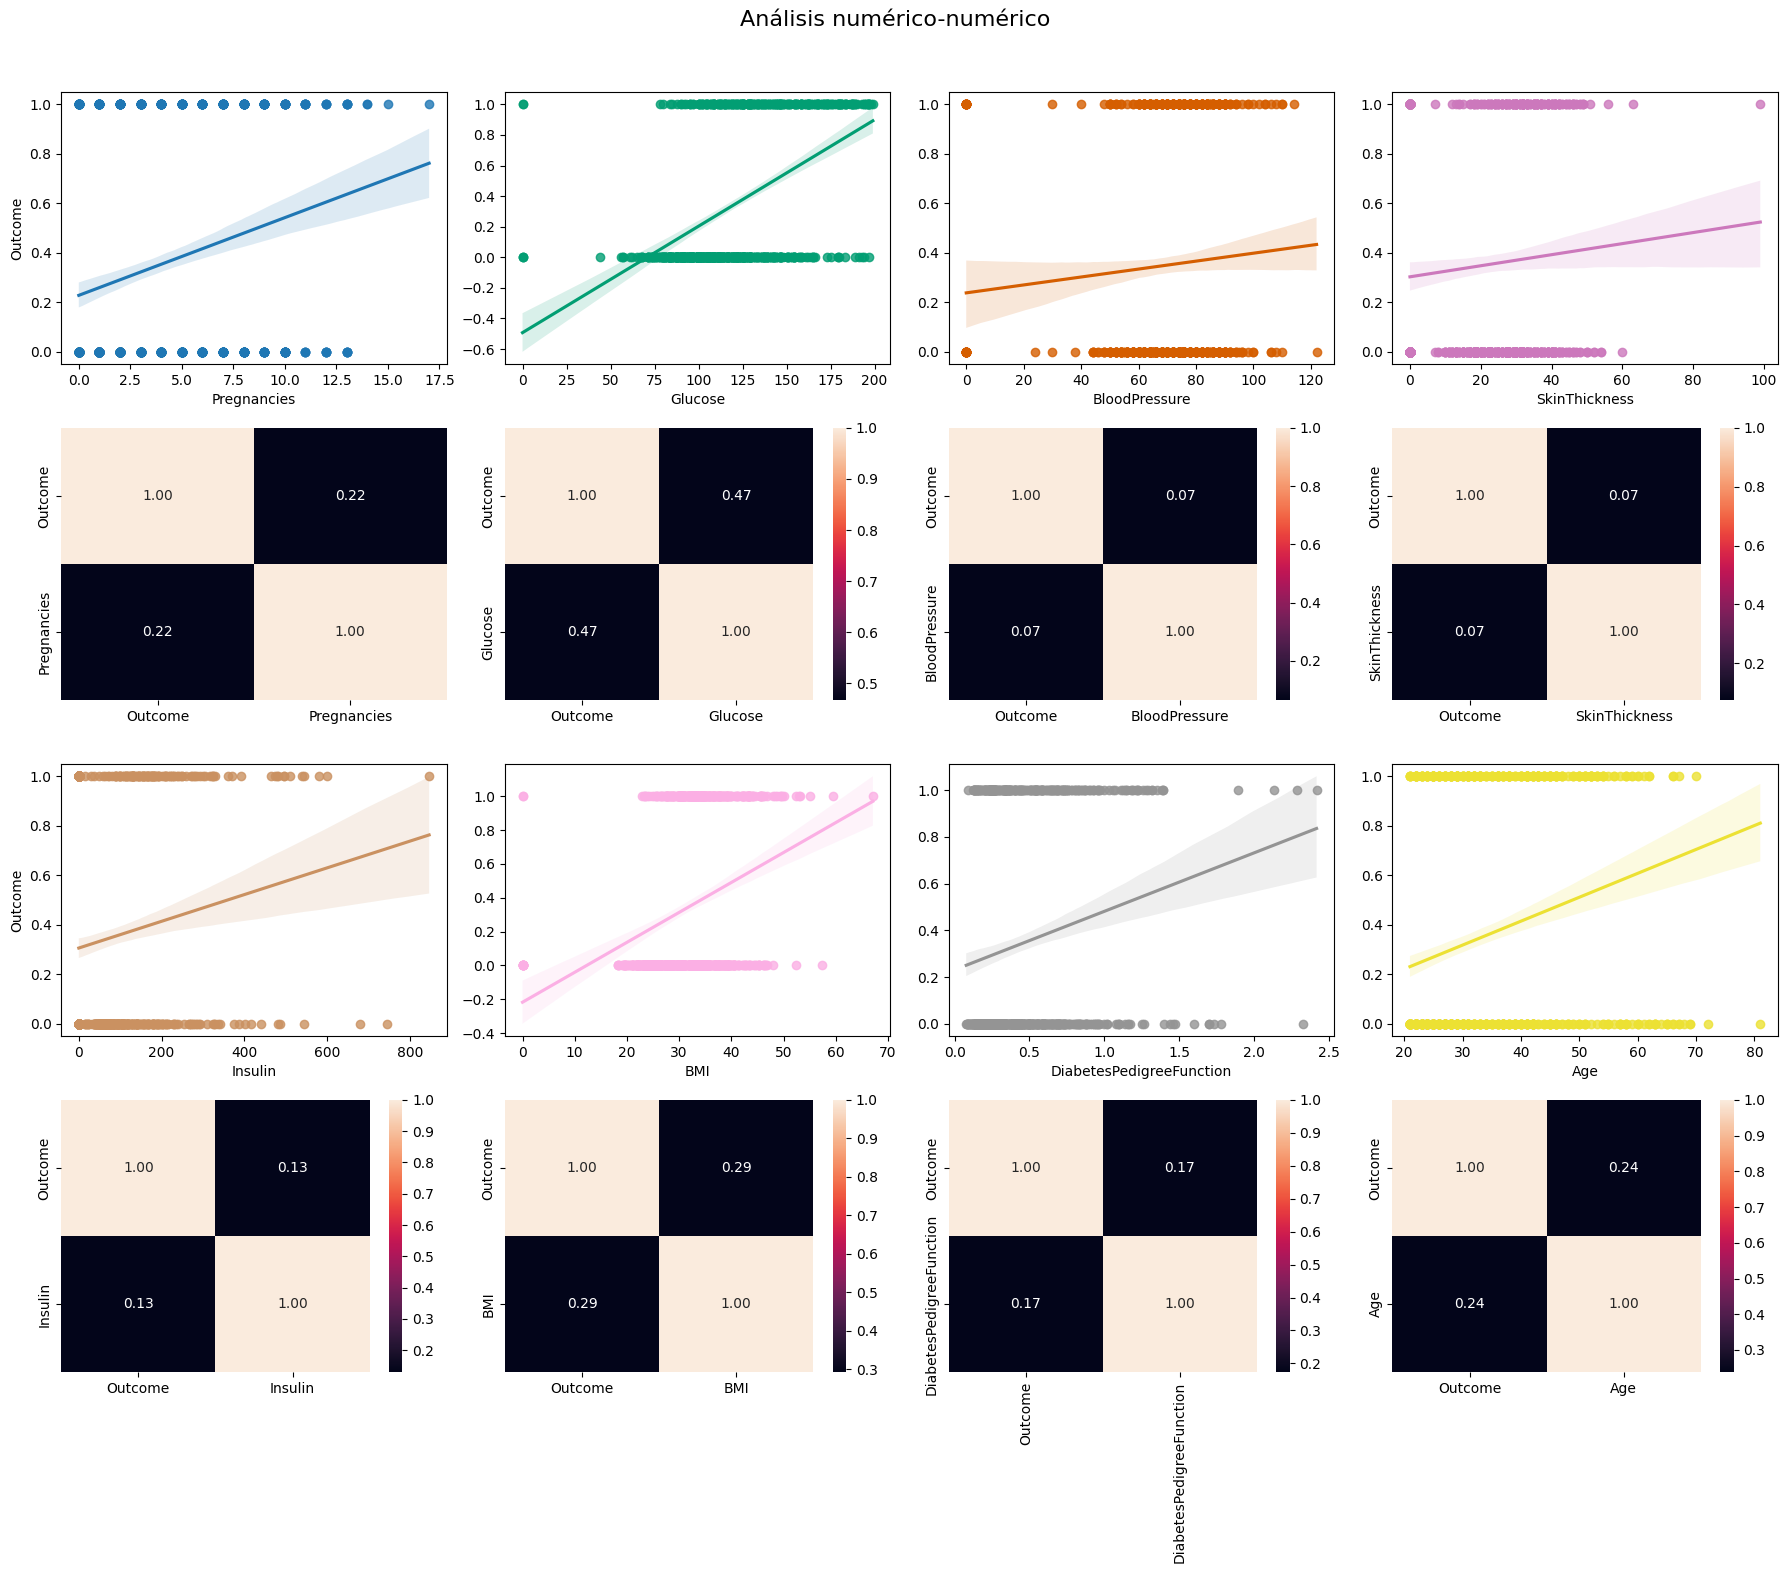

In [11]:
#Analisis de varias variables pt.2
fig, axis = plt.subplots(4, 4, figsize = (18, 16))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

sns.regplot(ax = axis[0, 0], data = df_enc, x = "Pregnancies", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "Glucose", y = "Outcome", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "BloodPressure", y = "Outcome", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_enc, x = "SkinThickness", y = "Outcome", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "Insulin", y = "Outcome", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_enc, x = "BMI", y = "Outcome", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_enc, x = "DiabetesPedigreeFunction", y = "Outcome", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = df_enc, x = "Age", y = "Outcome", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Las relaciones entre las diferentes variables y el Outcome (target):
- **Pregnancies**: Hay una relación positiva moderada entre el número de embarazos y la probabilidad de tener diabetes. La línea de tendencia muestra un ligero aumento en la probabilidad de Outcome positivo a medida que aumentan los embarazos.
- **Glucose**: Tiene una relación fuerte y positiva con Outcome. La pendiente de la línea de regresión es pronunciada, lo que indica que los niveles de glucosa más altos están asociados con una mayor probabilidad de diabetes.
- **BloodPressure**: La relación es más débil comparada con otras características. Aunque hay una ligera tendencia ascendente, la dispersión es significativa, lo que sugiere que podría no ser una de las características más determinantes.
- **SkinThickness**: La relación es débil, con una línea de tendencia casi plana y un intérvalo de confianza amplio, indicando que esta característica tiene un impacto menor en la predicción de Outcome.
- **Insulin**: Presenta una relación positiva, pero hay una alta variabilidad. Algunos valores de insulina bajos y muy altos están asociados con ambos resultados, lo que sugiere un comportamiento no lineal.
- **BMI**: Muestra una relación positiva significativa con Outcome, con una tendencia clara de que a mayor BMI, mayor es la probabilidad de diabetes.
- **DiabetesPedigreeFunction**: Hay una correlación moderada, indicando que una mayor propensión genética se asocia con una mayor probabilidad de diabetes, aunque la variabilidad es alta.
- **Age**: La edad tiene una relación positiva con Outcome. A medida que aumenta la edad, la probabilidad de tener diabetes también aumenta.

# 4.1 Correlation Analysis 

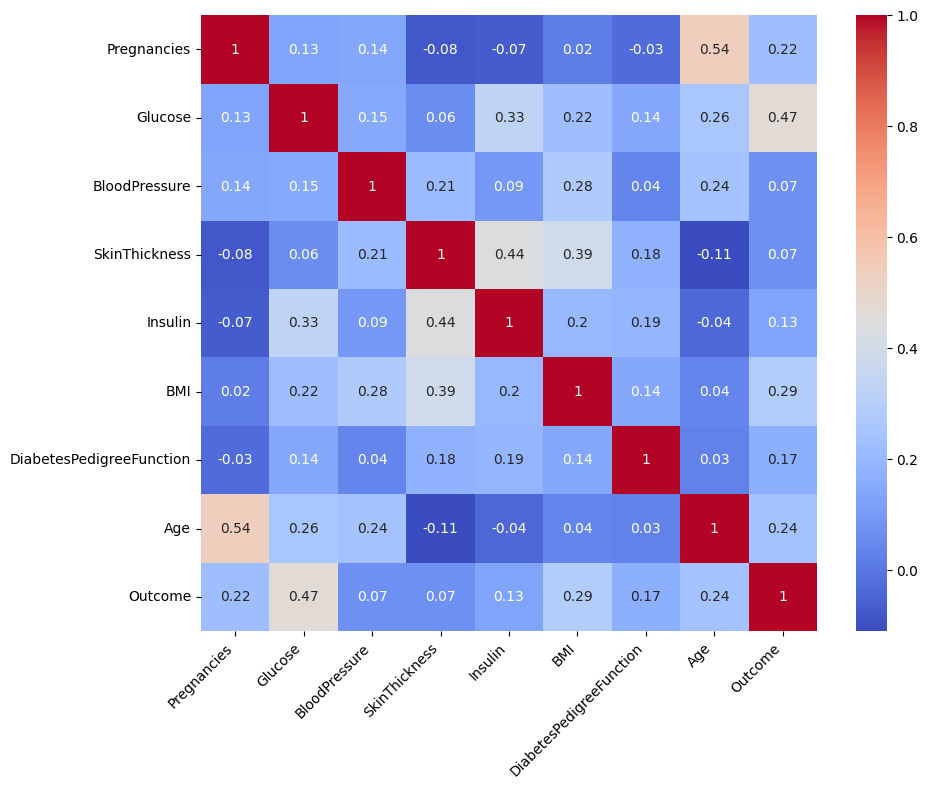

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

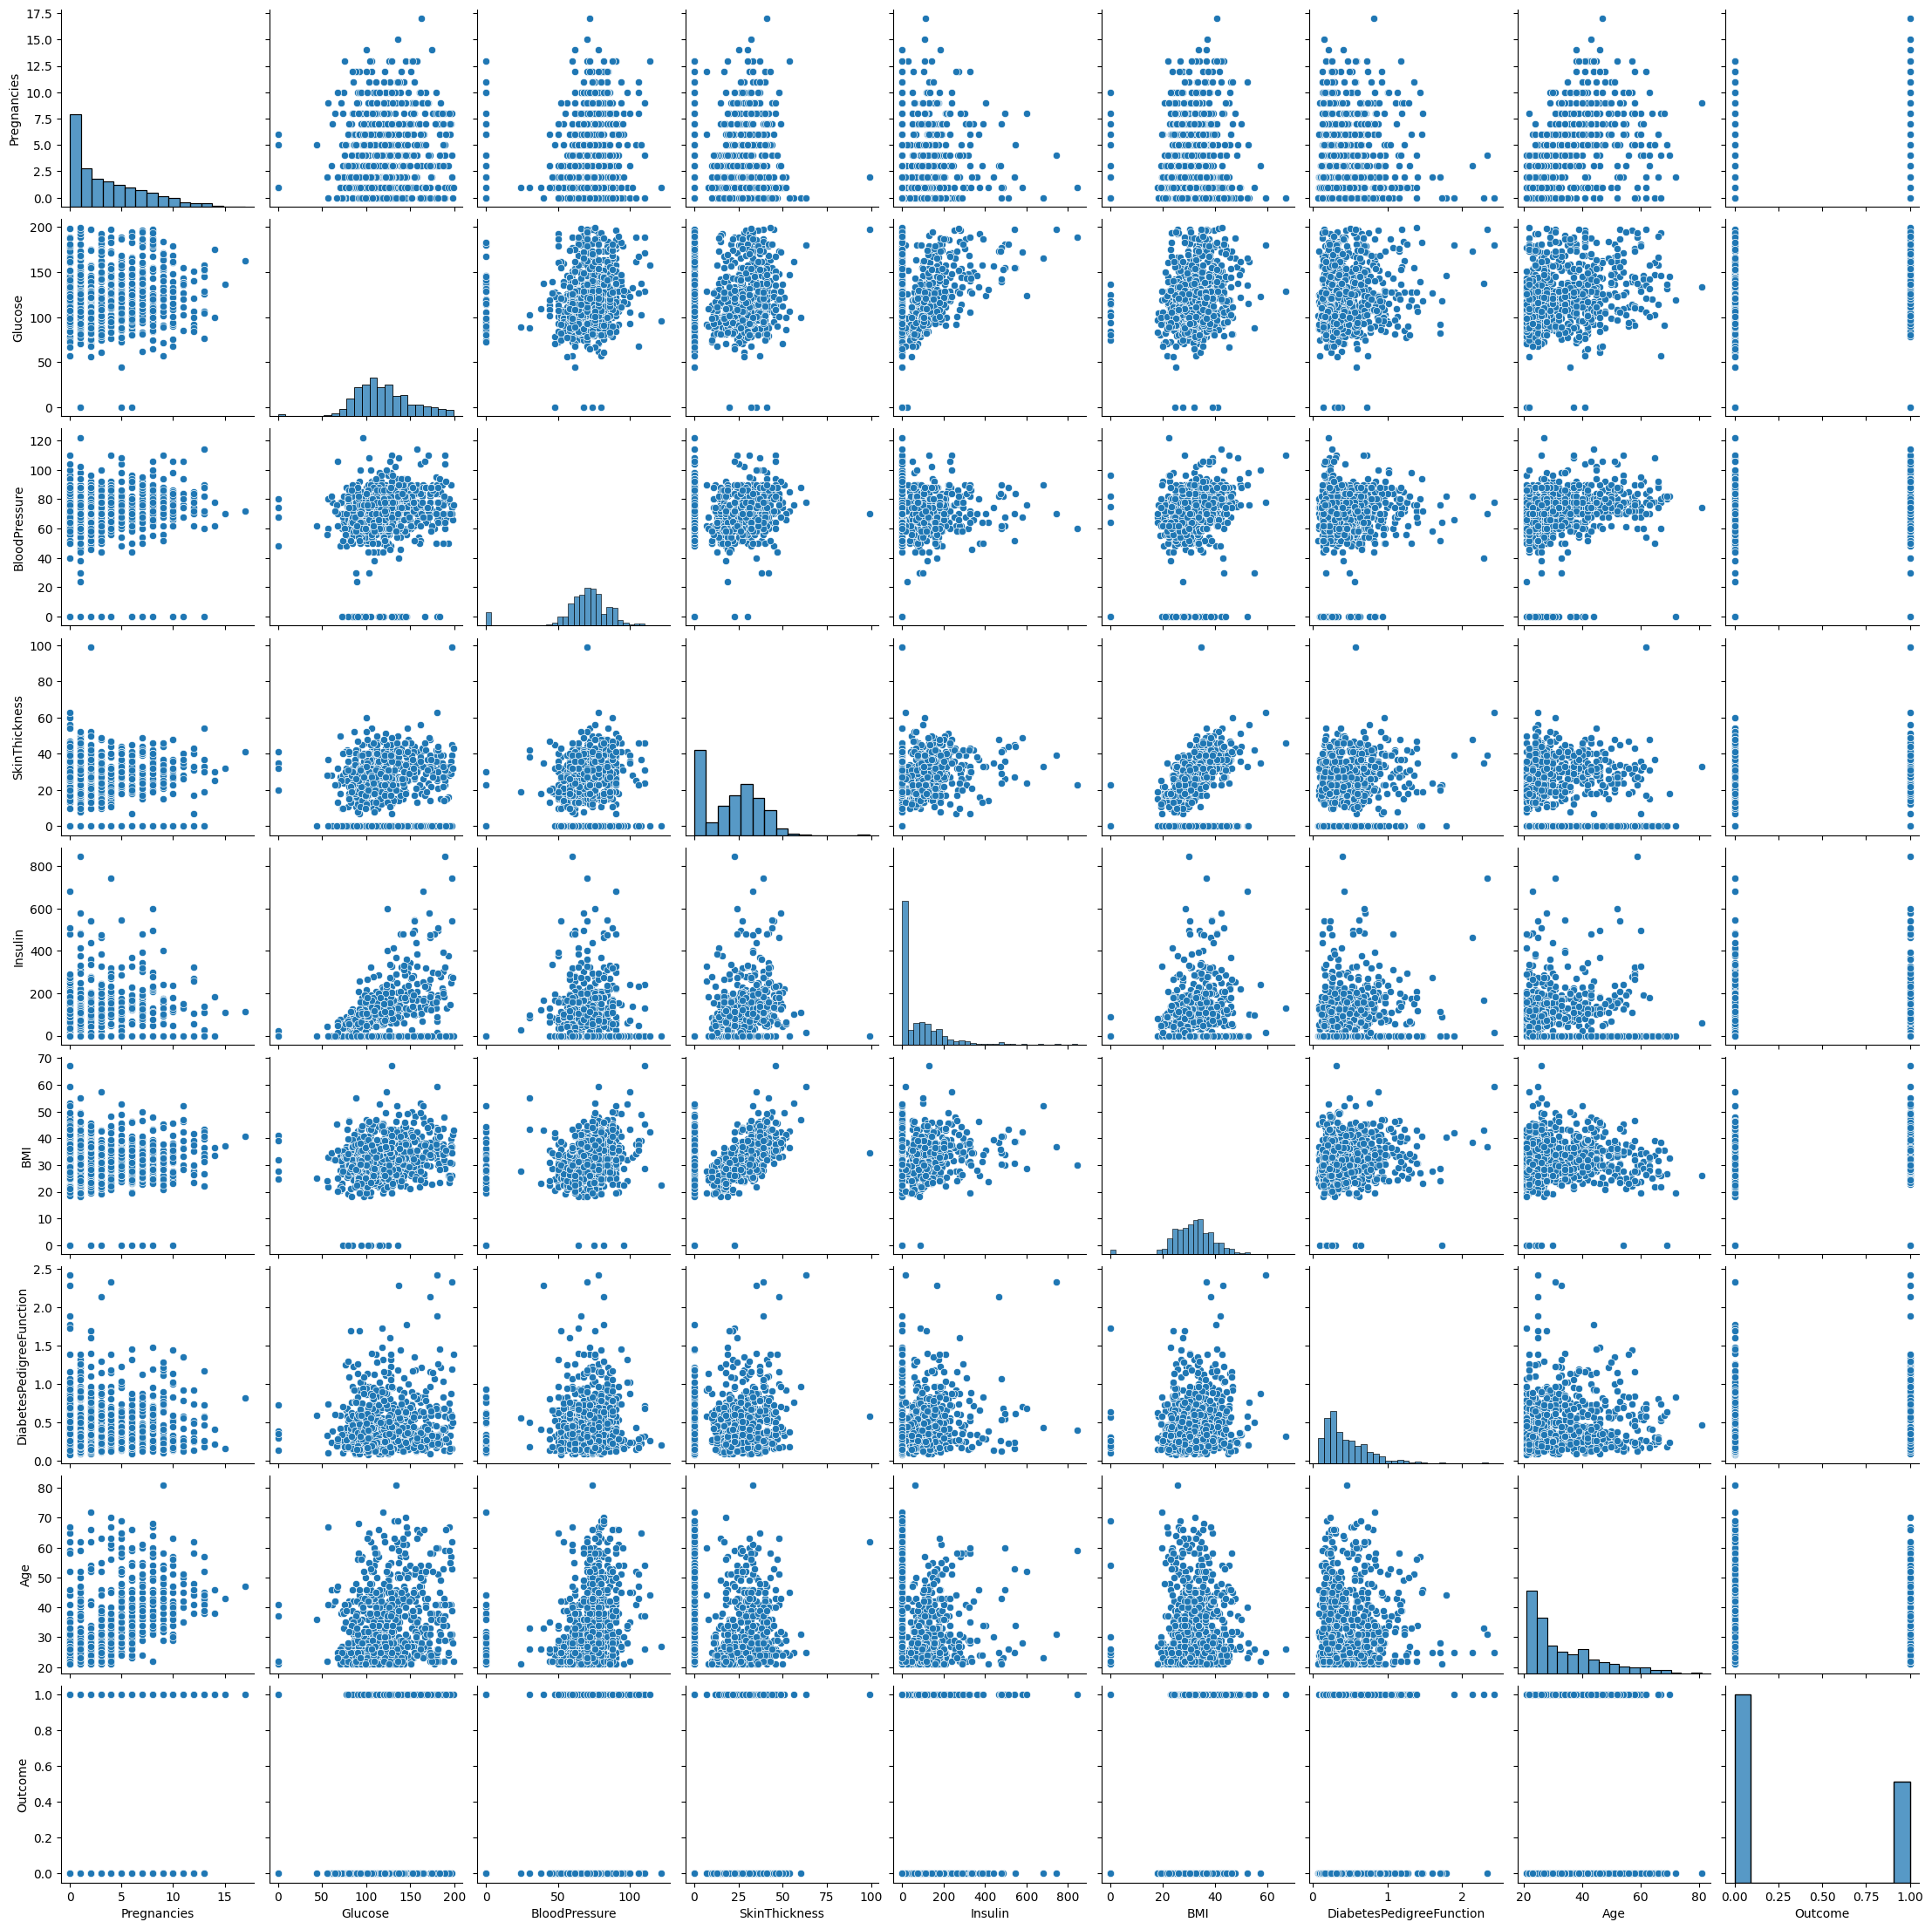

In [13]:
sns.pairplot(data=df_enc)
plt.show()

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [14]:
#Análisis de outliers
df_enc.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


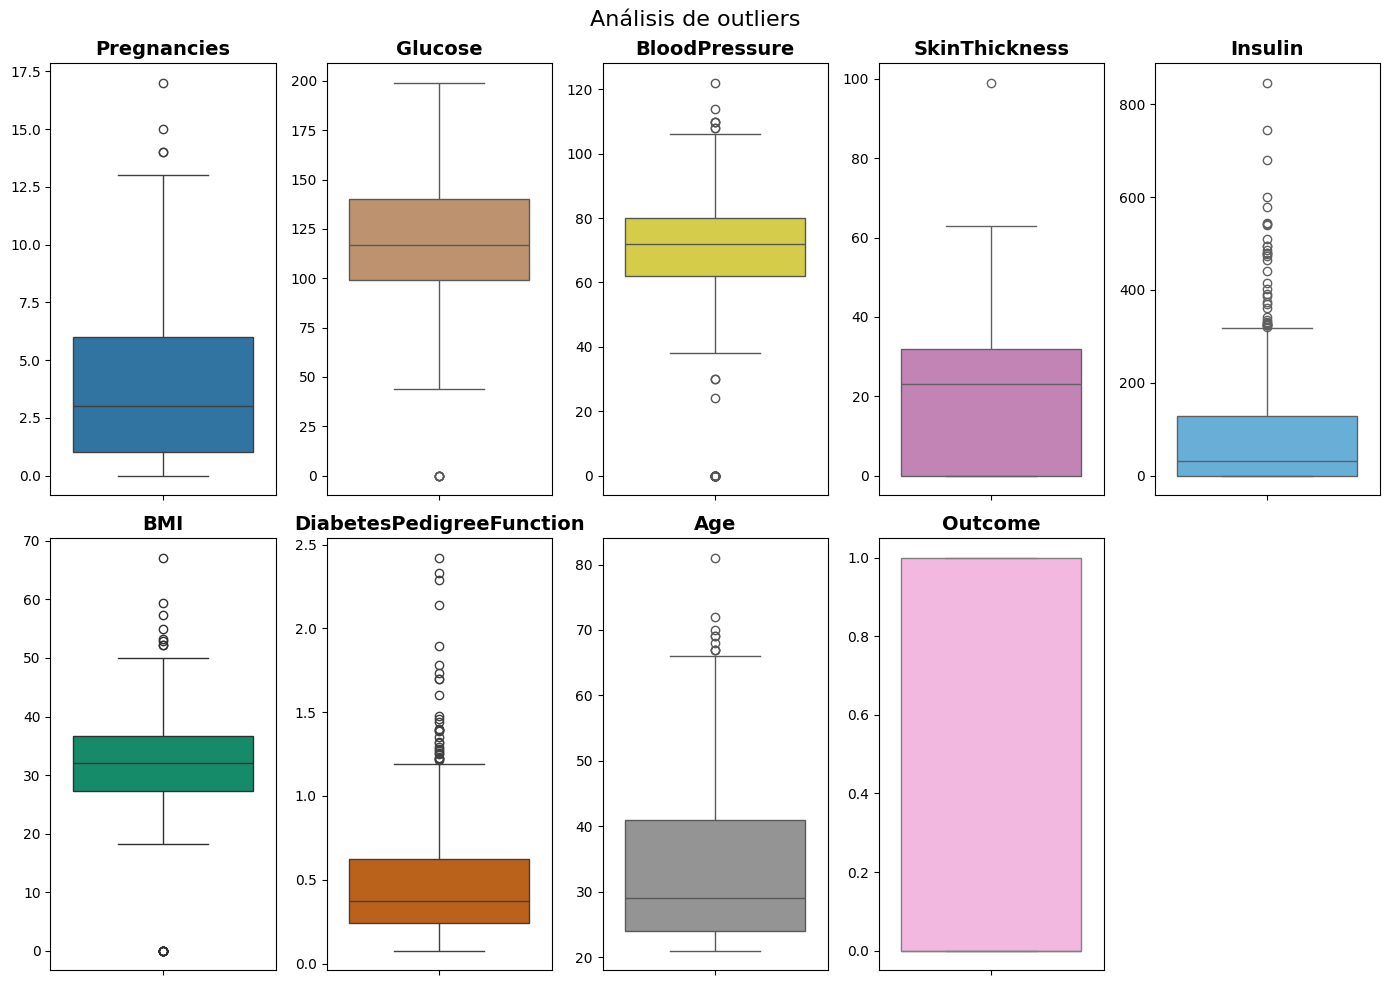

In [15]:
fig, axes = plt.subplots(2, 5, figsize = (14, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "Pregnancies").set_title("Pregnancies", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "Glucose", color=sns.color_palette("colorblind")[5]).set_title("Glucose", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "BloodPressure", color=sns.color_palette("colorblind")[8]).set_title("BloodPressure", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "SkinThickness", color=sns.color_palette("colorblind")[4]).set_title("SkinThickness", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Insulin", color=sns.color_palette("colorblind")[9]).set_title("Insulin", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "BMI", color=sns.color_palette("colorblind")[2]).set_title("BMI", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[3]).set_title("DiabetesPedigreeFunction", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "Age", color=sns.color_palette("colorblind")[7]).set_title("Age", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "Outcome", color=sns.color_palette("colorblind")[6]).set_title("Outcome", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

fig.delaxes(axes[1, 4])

plt.tight_layout()
plt.show()

Conclusiones:

1. **Pregnancies**: Tiene valores atípicos (outliers) altos, pero la mayoría de los valores están entre 0 y 6. Puede ser útil para predecir la diabetes.

2. **Glucose**: Los valores están concentrados entre 80 y 150, pero tiene algunos outliers bajos. La glucosa es una de las variables más relevantes para detectar diabetes, por lo que debería ser una de las primeras ramas en el árbol de decisión.

3. **BloodPressure**: Hay outliers altos y bajos, pero la mayoría de los valores están entre 60 y 80. La presión sanguínea puede ser una variable útil en combinación con otras características.

4. **SkinThickness**: Muestra varios valores atípicos altos y un rango común entre 20 y 40. La grasa subcutánea es un factor a considerar, aunque su impacto puede no ser tan fuerte como el de la glucosa.

5. **Insulin**: Tiene muchos outliers altos y un rango concentrado entre 0 y 300. La insulina es relevante, ya que una producción anormal puede indicar diabetes. Es probable que esta variable también sea importante en el árbol de decisión.

6. **BMI (Índice de Masa Corporal)**: Con un rango entre 20 y 40, tiene algunos valores atípicos. El IMC es un predictor común para la diabetes, por lo que debería ser considerado en el árbol.

7. **DiabetesPedigreeFunction**: Tiene varios outliers, pero la mayoría de los valores están por debajo de 1. Esta variable indica la herencia genética, lo cual es útil para evaluar el riesgo de diabetes.

8. **Age**: Muestra outliers y la mayoría de los valores están entre 25 y 50. La edad puede ser relevante, ya que el riesgo de diabetes aumenta con la edad.

In [16]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [17]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [18]:
df_enc_no['Pregnancies'] = remove_outliers(df_enc_no['Pregnancies'], 'Pregnancies')
df_enc_no['Glucose'] = remove_outliers(df_enc_no['Glucose'], 'Glucose')
df_enc_no['SkinThickness'] = remove_outliers(df_enc_no['SkinThickness'], 'SkinThickness')
df_enc_no['BloodPressure'] = remove_outliers(df_enc_no['BloodPressure'], 'BloodPressure')
df_enc_no['Insulin'] = remove_outliers(df_enc_no['Insulin'], 'Insulin')
df_enc_no['BMI'] = remove_outliers(df_enc_no['BMI'], 'BMI')
df_enc_no['DiabetesPedigreeFunction'] = remove_outliers(df_enc_no['DiabetesPedigreeFunction'], 'DiabetesPedigreeFunction')
df_enc_no['Age'] = remove_outliers(df_enc_no['Age'], 'Age')

# 5.2 Missing Values

In [19]:
df_enc.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 5.3 Split train/test of both Data Frames

In [20]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [21]:
#Dividimos el data frame original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 5.4 Normalization

In [22]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [23]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 5.5 Min-Max Scaling

In [24]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [25]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 6. Feature Selection

In [26]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [27]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 9, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 9, 'without_outliers')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(


# 6.1 Applying the filter to the normalized and minmax scaled data frames

In [28]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# 6.2 Saving the CSV files

In [29]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [30]:
# Data frame de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Data frame de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Machine Learning
# 1. Decision making: Which is the best dataset?

In [31]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

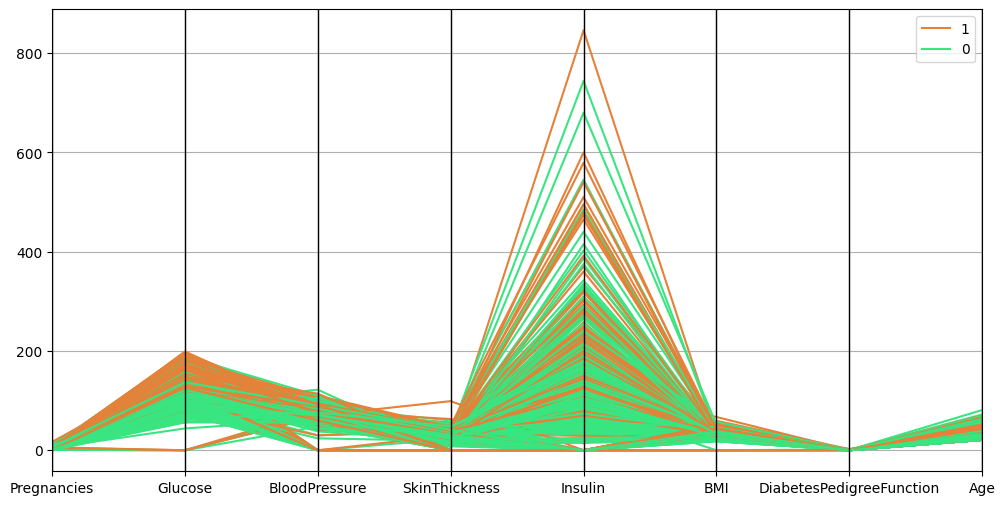

In [32]:
#Visualizamos la relación entre las variables
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

Este gráfico de coordenadas paralelas muestra la distribución de las variables para las personas con diabetes (en color naranja, etiquetado como "1") y sin diabetes (en color verde, etiquetado como "0"). A continuación se explica el análisis de cada variable y su posible relación con la diabetes:

1. **Pregnancies**: Se observa que los valores de embarazo tienden a ser más altos en personas con diabetes (naranja). Esto sugiere que podría ser un factor importante en la clasificación de diabetes, especialmente para diferenciar entre casos con valores altos y bajos.

2. **Glucose**: La diferencia entre personas con y sin diabetes es evidente. Los casos con diabetes (naranja) tienen niveles de glucosa más altos que aquellos sin diabetes (verde). Esto confirma que la glucosa es una variable clave para predecir diabetes.

3. **BloodPressure**: La presión arterial no muestra una diferencia clara entre personas con y sin diabetes. Esto podría indicar que, en este conjunto de datos, la presión arterial tiene una relación débil con la diabetes.

4. **SkinThickness**: La mayoría de los valores de grosor de piel están en un rango similar para ambos grupos, aunque hay algunos casos de personas con diabetes con valores más altos. Esta variable podría ser relevante pero no tan importante como otras.

5. **Insulin**: Los valores de insulina son significativamente más altos en personas con diabetes (naranja), con una mayor variabilidad. Esto sugiere que es una variable muy importante en la predicción de diabetes y debería tener prioridad en el árbol de decisión.

6. **BMI (Índice de Masa Corporal)**: Los niveles de BMI son generalmente altos para ambos grupos, pero las personas con diabetes tienden a tener valores un poco más altos. Esta variable también puede ser útil, aunque menos discriminante que la glucosa o la insulina.

7. **DiabetesPedigreeFunction**: Existe una ligera tendencia a que los valores de la función de pedigrí de diabetes sean más altos en personas con diabetes, lo cual sugiere una influencia genética que podría ayudar en la clasificación.

8. **Age**: La edad muestra una tendencia leve donde las personas con diabetes suelen ser mayores, pero la diferencia no es tan marcada.

In [33]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = DecisionTreeClassifier(random_state=42)
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )
  models.append(model)
sorted(results, key = lambda x: x["train_score"], reverse = True)

[{'index': 0, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 1, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 2, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 3, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 4, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 5, 'train_score': 1.0, 'test_score': 0.7792207792207793}]

# We can use one of the following models: **X_TRAIN_WITH_OUTLIERS_SEL/NORM_SEL/MINMAX_SEL**

In my case, I will select the model[0]: X_train_with_outliers_sel

In [34]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
tree_rules = export_text(model, feature_names = columns)
print(tree_rules)

|--- Glucose <= 0.66
|   |--- BMI <= 0.37
|   |   |--- BMI <= 0.35
|   |   |   |--- Age <= 0.84
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.53
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.53
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.54
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.54
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.84
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.24
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.24
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  0.35
|   |   |   |--- SkinThickness <= 0.35
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  0.35
|   |   |   |   |--- Pregnancies <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  0.15
|   |   |   |   |   |--- class: 1
|   |--- BMI >  0.37
|   |   |--- Glucose <= 0.43
|   |   |   |--- DiabetesPedigre

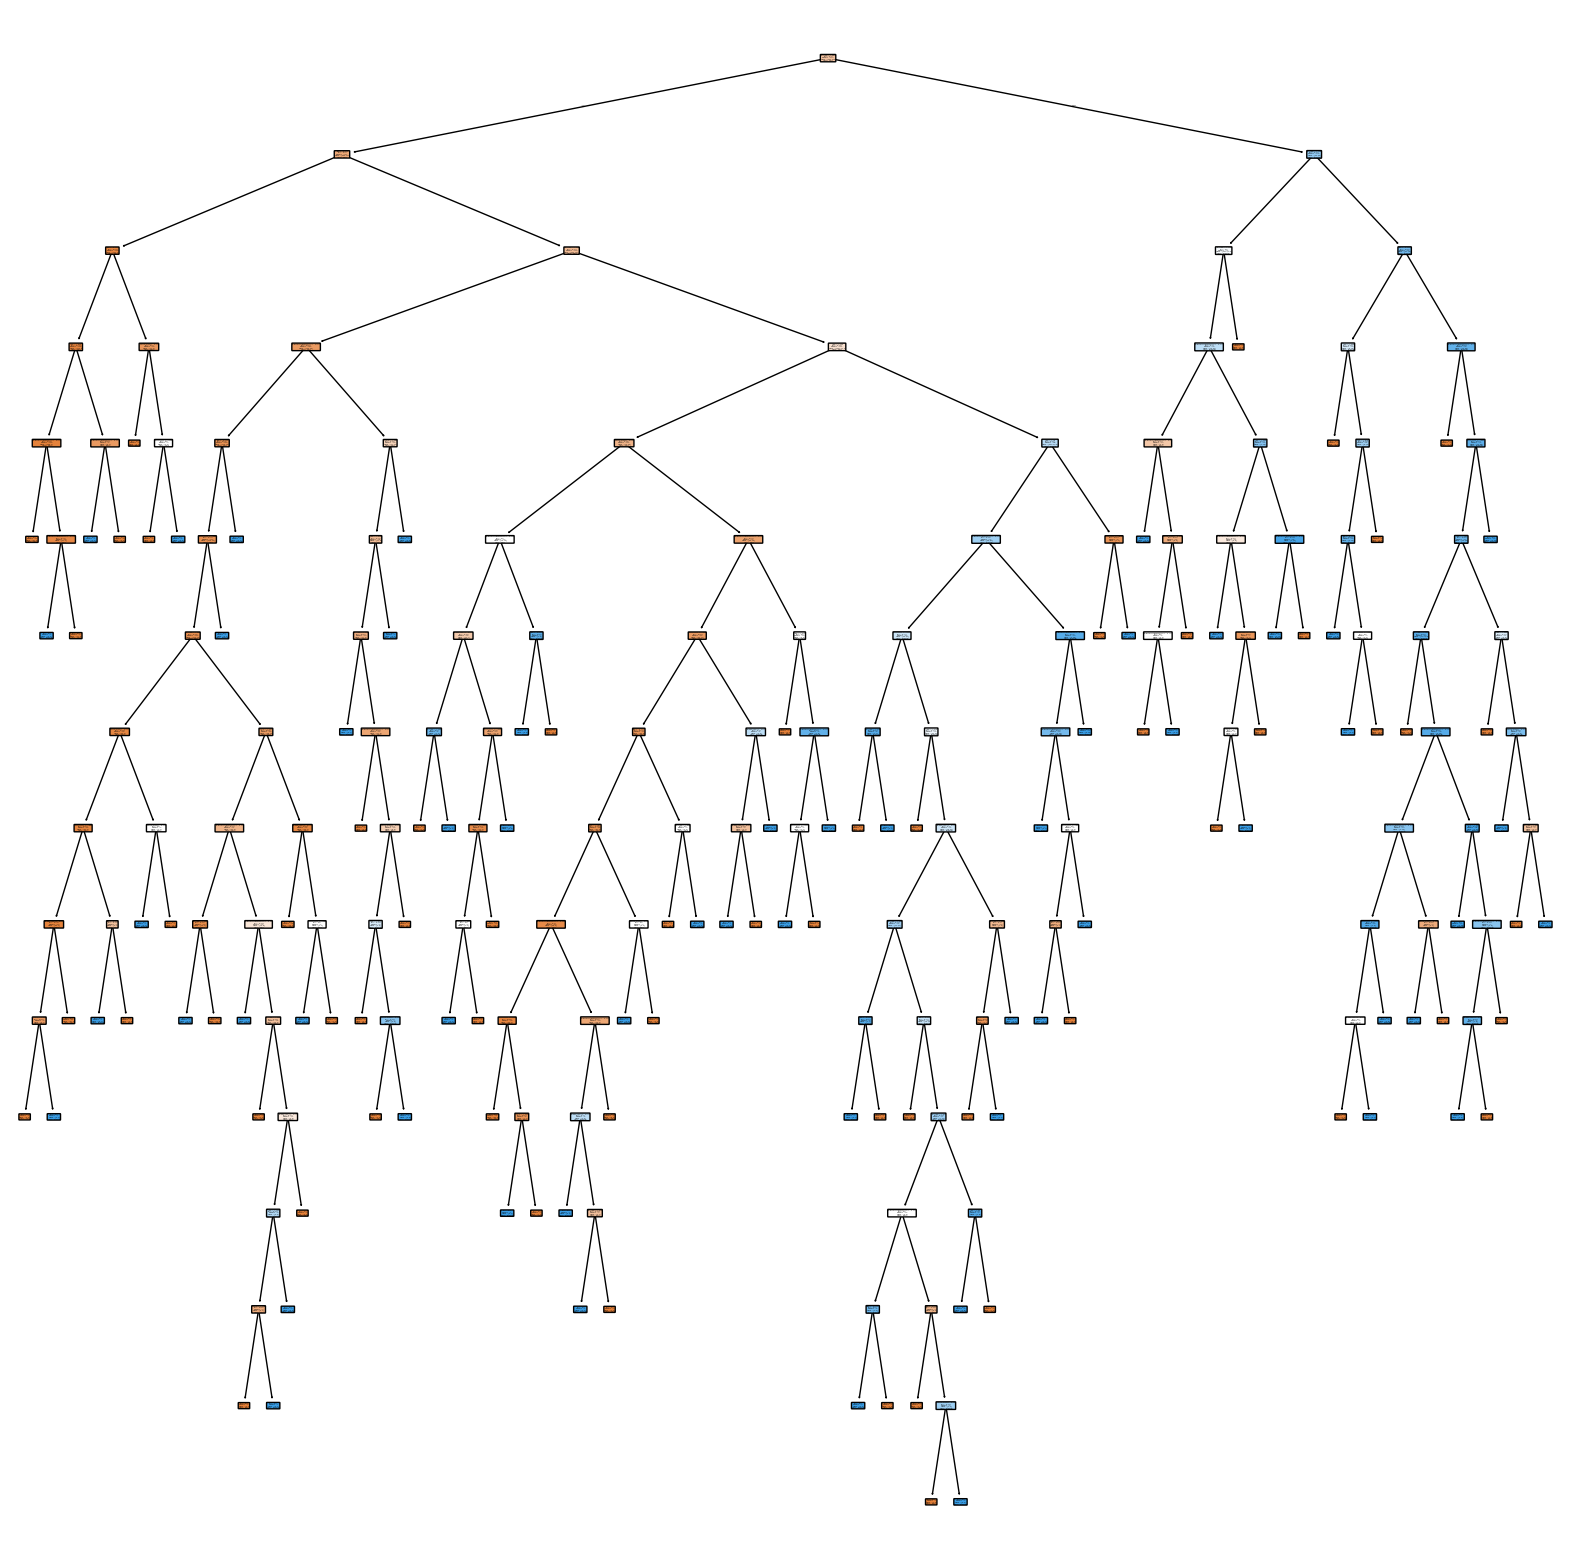

In [35]:
#Visualizamos el árbol de decisiones
fig = plt.figure(figsize=(20,20))

plot_tree(
    model, 
    feature_names = list(X_train_with_outliers_sel.columns), 
    class_names = ["Sano", "Diabetes"], 
    filled = True, 
    rounded = True)

plt.show()

In [36]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7987012987012987


# Model Optimization

In [37]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 4, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10]},
             scoring='accuracy')

In [38]:
grid.fit(X_train_with_outliers_sel, y_train)

print(f"The best hyperparameters are: {grid.best_params_}")

The best hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [39]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train_with_outliers_sel, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=42)

In [40]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7987012987012987


In [41]:
dump(model, open("../models/tree_classifier_crit-entropy_maxdepth-10_min_leaf-4_min_split-2_42.sav", "wb"))

# Random Forest 

In [42]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = RandomForestClassifier(random_state=42, n_estimators=80)
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )
  models.append(model)
sorted(results, key = lambda x: x["train_score"], reverse = True)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[{'index': 0, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 1, 'train_score': 1.0, 'test_score': 0.7662337662337663},
 {'index': 2, 'train_score': 1.0, 'test_score': 0.7857142857142857},
 {'index': 3, 'train_score': 1.0, 'test_score': 0.7662337662337663},
 {'index': 4, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 5, 'train_score': 1.0, 'test_score': 0.7662337662337663}]

In [43]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7792207792207793


In [44]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 4, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=80, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10]},
             scoring='accuracy')

In [45]:
grid.fit(X_train_with_outliers_sel, y_train)

print(f"The best hyperparameters are: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [49]:
model = RandomForestClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, random_state = 42)
model.fit(X_train_with_outliers_sel, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [50]:
best_model = models[0]
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7792207792207793


In [52]:
dump(model, open("../models/randomforest_classifier__criterion-gini_max_depth-10_n_estimators-80_42.sav", "wb"))